In [9]:
def pd_dttm_import(want_cols):
    '''Parameters: takes in list of column names wanted that will be
    used in pandas .read_csv method
    
    Results: Outputs the indices of the columns names that are date
    values and uses resulting list of indices as parse_dates parameter
    in pandas .read_csv method'''
    dt_ind = []
    for i in want_cols:
        if 'dttm' in i.lower() or 'date' in i.lower():
            dt_ind.append(want_cols.index(i))
    return dt_ind

In [10]:
#to take sample data
import pandas as pd
df = pd.read_csv('EMS_data.csv', usecols=Wanted_Cols, skiprows=lambda i: i>0 and random.random() > 0.05, parse_dates=pd_dttm_import(Wanted_Cols))

/home/christopher/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Need to do if includes box, chunk, etc
df['Box'] = df['Box'].astype(str)
#NEED TO FIGURE OUT WHAT ALTERNATIVE VALUES FOR ORIGINAL PRIORITY MEAN
df['Original Priority'] = df['Original Priority'].astype(str)
df['Neighborhooods - Analysis Boundaries'] = df['Neighborhooods - Analysis Boundaries'].astype(str)

In [8]:
def to_time_delta(df, col, time2, time1):
    #create new copy of data frame taking only not null values
    df_ind = df[df[time1].notna() & df[time2].notna()]
    frame = pd.DataFrame(df_ind[col])
    frame['time_delta'] = (df_ind[time2] - df_ind[time1]).apply(lambda x: timedelta.total_seconds(x))
    return frame

def to_time_delta(df, time2, time1):
    '''Return series of difference between two datetime columns
    '''
    #create new copy of data frame taking only not null values
    return (df[time2] - df[time1]).apply(lambda x: timedelta.total_seconds(x) if not isinstance(x, pd._libs.tslibs.nattype.NaTType) else None)

Graphing work

In [9]:
#plot time difference between two events across rows
#comparing average commute time between districts
def plot_time_diff_by_cat(df, col, time2, time1, cat=None):
    '''Parameters: Takes in dataframe(df), col that includes x values (col), certain 
    x values as a list (cat), second time event (time2), first time even(time1)
    
    Outputs:A graph showing the average time diff between events time2 and time1 by the 
    values specified (or all values if none specified) in column
    '''
    fig, ax = plt.subplots(figsize=(20,20))
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel(f'Time (s)', fontsize=20)
    ax.set_title(f'Time between {time1} and {time2} vs. {col}', fontsize=20)
    x=[]
    y=[]
    delta_df = to_time_delta(df, col, time2, time1)
    if cat == None:        
        for i in delta_df[col].unique():
            x.append(i)
            y.append(np.mean(delta_df[delta_df[col] == i]['time_delta']))
    else:
        for i in cat:
            x.append(i)
            y.append(np.mean(delta_df[delta_df[col] == i]['time_delta']))
        
    ax.bar(x,y)

    


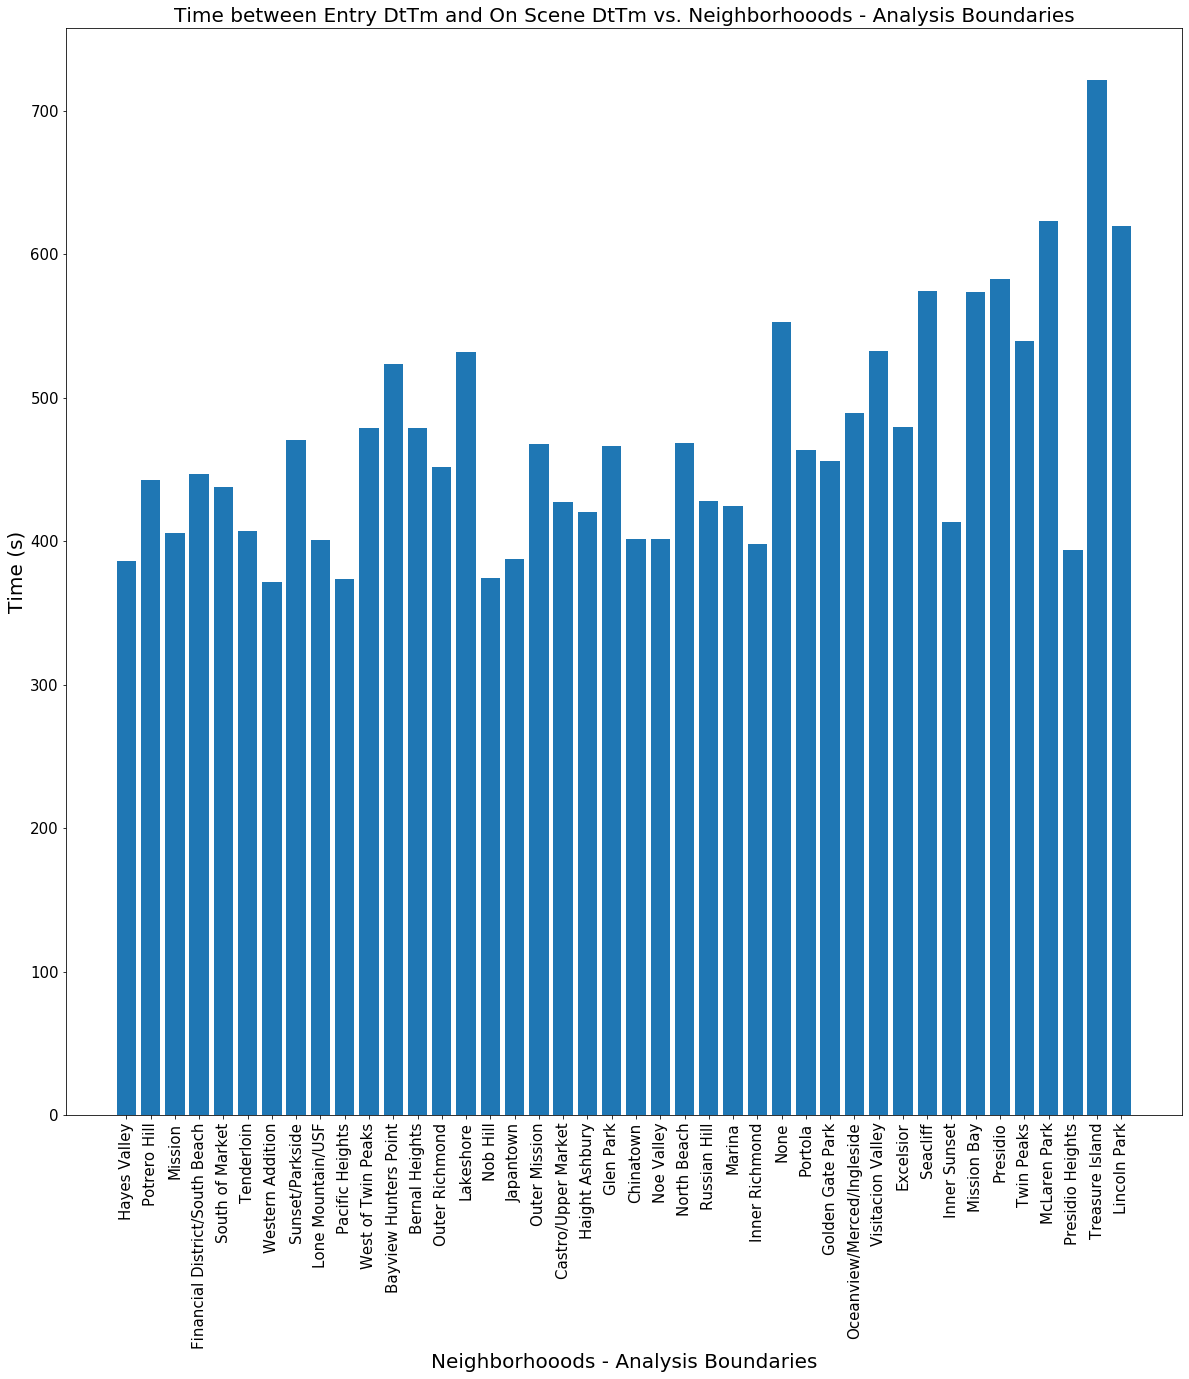

In [81]:
plot_time_diff_by_cat(df, 'Neighborhooods - Analysis Boundaries', 'On Scene DtTm','Entry DtTm')

In [69]:
def sub_occ_bar_graph(df, high_cat, low_cat, title, vals=None):
    #Takes in dataframe(df), higher level category/feature(high_cat), lower level feature(low_cat)
    #returns bar graph of the count of categories in the low_cat for each high_cat value
    
    if vals == None:
        
    fig, ax = plt.subplots(figsize=(20,20))
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_xlabel(high_cat, fontsize=20)
    ax.set_ylabel('Occurences', fontsize=20)
    ax.set_title(f'{title}', fontsize=20)
    ax = sns.countplot(x=high_cat, hue=low_cat, data=df)


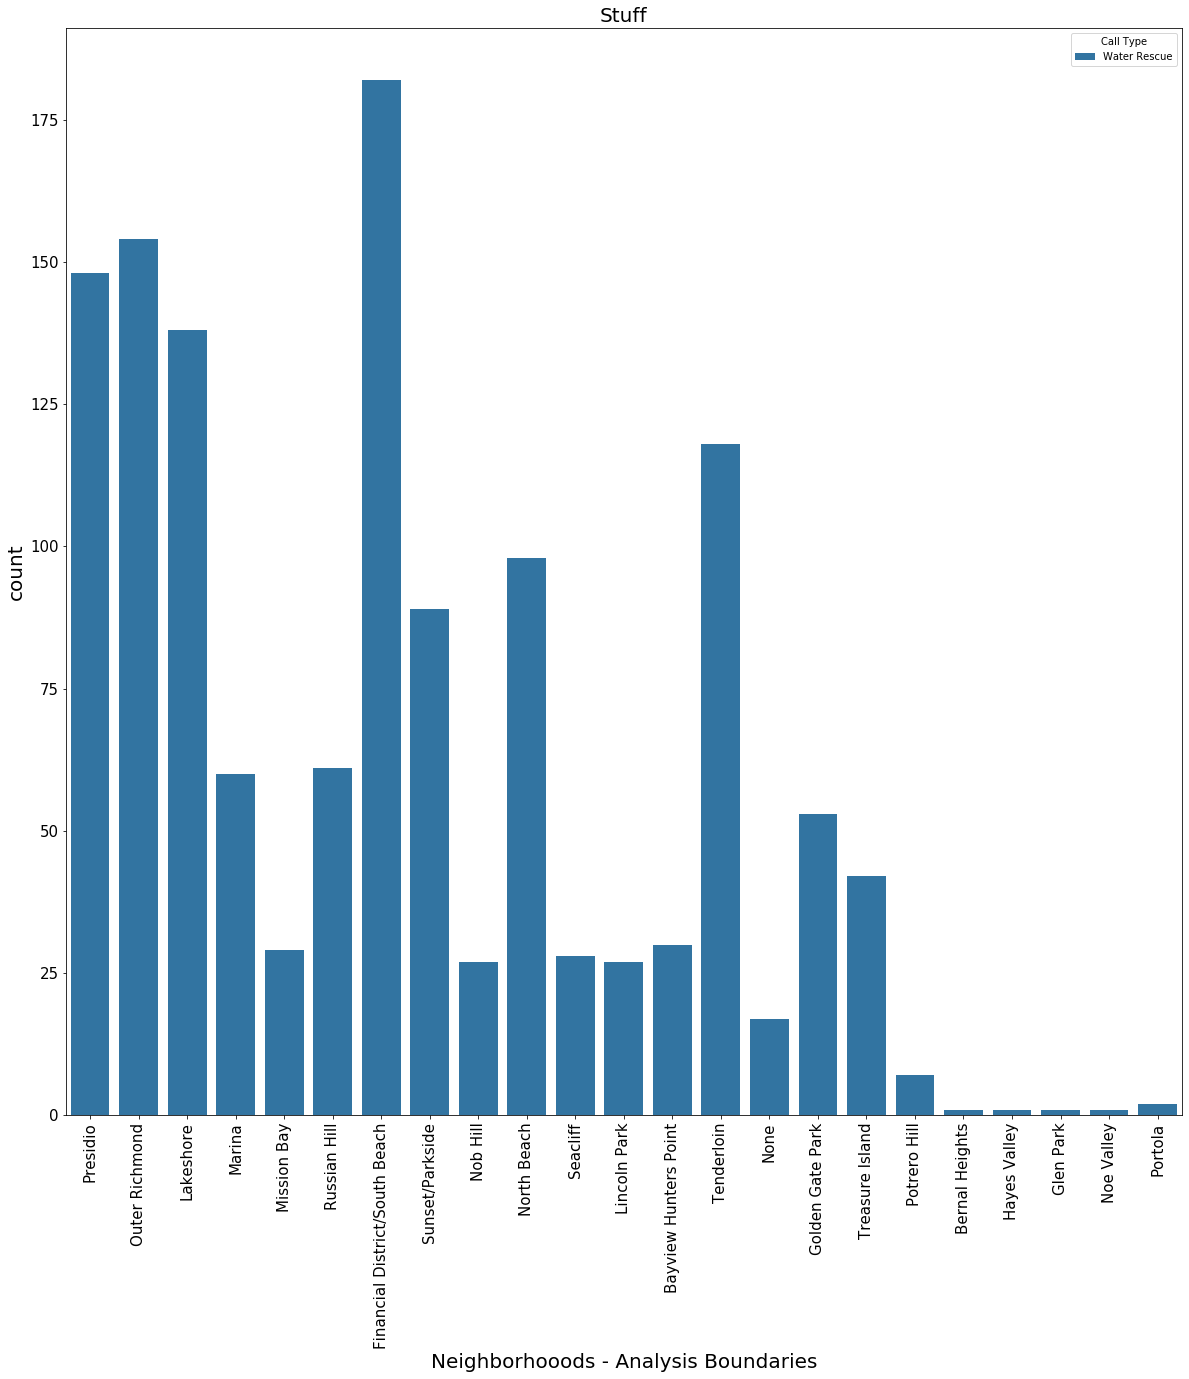

In [79]:
#fig, ax = plt.subplots(figsize=(20,20))
#plt.xticks(rotation=90)
#ax = sns.countplot(x="Neighborhooods - Analysis Boundaries", hue="Call Type", data=df_tops_)

gh = df[df['Call Type'] == 'Water Rescue']
sub_occ_bar_graph(gh, 'Neighborhooods - Analysis Boundaries', 'Call Type', 'Stuff')

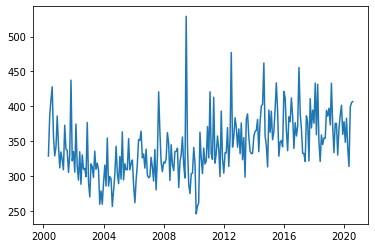

In [74]:
plt.plot(to_time_delta(df[df['Neighborhooods - Analysis Boundaries'] == 'Tenderloin'], 'Call Date','On Scene DtTm','Dispatch DtTm').resample('M', on='Call Date').mean())

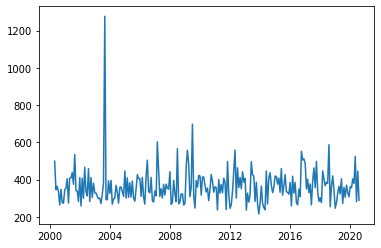

In [75]:
plt.plot(to_time_delta(df[df['Neighborhooods - Analysis Boundaries'] == 'Inner Sunset'], 'Call Date','On Scene DtTm','Dispatch DtTm').resample('M', on='Call Date').mean())

COMPLETE

In [15]:
neigh = ['Tenderloin','Mission','South of Market']

In [54]:
def hist_time_by_group_time(df, col, event2, event1, vals=None):
    #if no specified values, run through all in col
    if vals == None:
        vals = df[col].unique()    
    fig, ax = plt.subplots(len(vals), 1, figsize=(15, 5*len(vals)))
    for i,j in enumerate(vals):        
        time_frame = to_time_delta(df[df[col] == j], 'Call Date', event2, event1)
        st = np.std(time_frame['time_delta'])
        mn = np.mean(time_frame['time_delta'])
        time_frame[(time_frame['time_delta'] > 0) & (time_frame['time_delta'] < (int(mn) + 3*int(st)))].hist(ax=ax[i])
        ax[i].set_title(f'{j} - delta between {event1} and {event2}')

#based on actual data, should see the range that a huge percentage falls within and just do analysis on that
#can look into relationships on why some responses seem to take so long

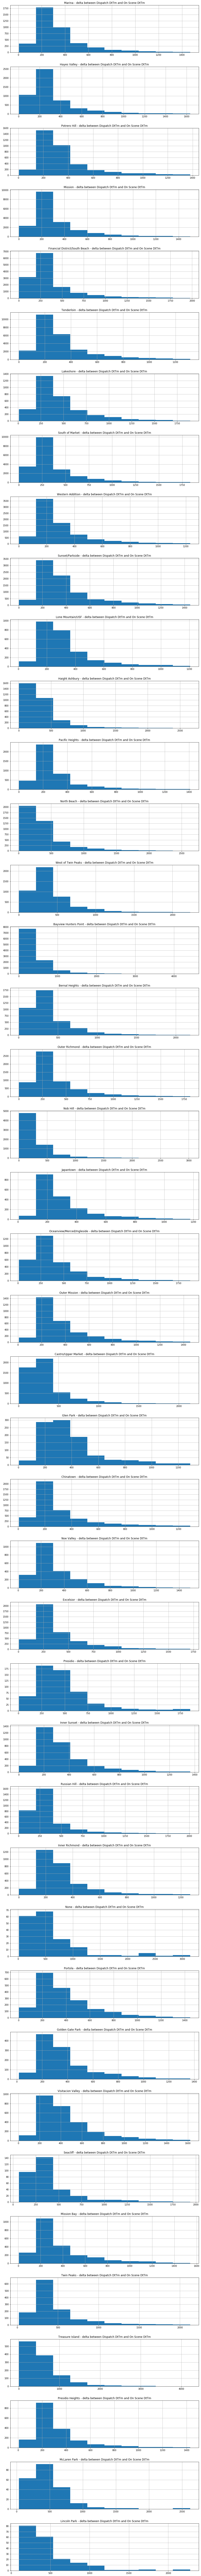

In [55]:
hist_time_by_group_time(df, 'Neighborhooods - Analysis Boundaries', 'On Scene DtTm','Dispatch DtTm')

In [87]:
to_time_delta(df, 'Battalion', 'On Scene DtTm','Dispatch DtTm').groupby('Battalion').mean()

,time_delta
Battalion,
B01,358.207917
B02,345.043576
B03,389.284008
B04,335.142322
B05,348.487874
B06,364.985265
B07,380.402595
B08,423.753583
B09,427.853558


In [88]:
to_time_delta(df, 'Battalion', 'On Scene DtTm','Dispatch DtTm').groupby('Battalion').std()

,time_delta
Battalion,
B01,513.390268
B02,397.128562
B03,541.640451
B04,602.990199
B05,486.175928
B06,489.498501
B07,442.311767
B08,440.100125
B09,431.218115


In [91]:
df['Neighborhooods - Analysis Boundaries'].unique()

array(['Marina', 'Hayes Valley', 'Potrero Hill', 'Mission',
       'Financial District/South Beach', 'Tenderloin', 'Lakeshore',
       'South of Market', 'Western Addition', 'Sunset/Parkside',
       'Lone Mountain/USF', 'Haight Ashbury', 'Pacific Heights',
       'North Beach', 'West of Twin Peaks', 'Bayview Hunters Point',
       'Bernal Heights', 'Outer Richmond', 'Nob Hill', 'Japantown',
       'Oceanview/Merced/Ingleside', 'Outer Mission',
       'Castro/Upper Market', 'Glen Park', 'Chinatown', 'Noe Valley',
       'Excelsior', 'Presidio', 'Inner Sunset', 'Russian Hill',
       'Inner Richmond', 'None', 'Portola', 'Golden Gate Park',
       'Visitacion Valley', 'Seacliff', 'Mission Bay', 'Twin Peaks',
       'Treasure Island', 'Presidio Heights', 'McLaren Park',
       'Lincoln Park'], dtype=object)

In [96]:
len(df['RowID'].unique())

267320

In [93]:
len(df)

267320

In [104]:
df[df['Call Number'] == 122860052].groupby('Call Number').head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
251820,122860052,T15,12094502,Structure Fire,2012-10-12,2012-10-11,2012-10-12 04:39:36,2012-10-12 04:40:36,2012-10-12 04:40:53,2012-10-12 05:06:05,...,False,Fire,4,TRUCK,15.0,8,7,West of Twin Peaks,"(37.740225301081, -122.466282912593)",122860052-T15
253398,122860052,T14,12094502,Structure Fire,2012-10-12,2012-10-11,2012-10-12 04:39:36,2012-10-12 04:40:36,2012-10-12 04:40:53,2012-10-12 06:28:32,...,False,Fire,4,TRUCK,37.0,8,7,West of Twin Peaks,"(37.740225301081, -122.466282912593)",122860052-T14
253539,122860052,E06,12094502,Structure Fire,2012-10-12,2012-10-11,2012-10-12 04:39:36,2012-10-12 04:40:36,2012-10-12 04:40:53,NaT,...,True,Fire,4,ENGINE,43.0,8,7,West of Twin Peaks,"(37.740225301081, -122.466282912593)",122860052-E06
255374,122860052,E39,12094502,Structure Fire,2012-10-12,2012-10-11,2012-10-12 04:39:36,2012-10-12 04:40:36,2012-10-12 04:40:53,2012-10-12 04:43:29,...,True,Fire,4,ENGINE,1.0,8,7,West of Twin Peaks,"(37.740225301081, -122.466282912593)",122860052-E39
255471,122860052,T18,12094502,Structure Fire,2012-10-12,2012-10-11,2012-10-12 04:39:36,2012-10-12 04:40:36,2012-10-12 04:40:53,2012-10-12 04:42:55,...,False,Fire,4,TRUCK,5.0,8,7,West of Twin Peaks,"(37.740225301081, -122.466282912593)",122860052-T18


In [113]:
counts = df[df['Call Type'] == 'Structure Fire'].groupby('Call Number').count()['Unit ID']

In [115]:
sum(counts > 1)

4268

In [117]:
for i in df['Call Type'].unique():
    counts = df[df['Call Type'] == i].groupby('Call Number').count()['Unit ID']
    print(f'{i}: {(sum(counts > 1))/len(counts)}')


Medical Incident: 0.03509842729653816
Alarms: 0.053329437118749316
Traffic Collision: 0.0652619256657887
Gas Leak (Natural and LP Gases): 0.036852589641434265
Other: 0.030073349633251832
Smoke Investigation (Outside): 0.027164685908319185
Structure Fire: 0.1500281214848144
Citizen Assist / Service Call: 0.00935288169868554
Water Rescue: 0.2512413108242304
Outside Fire: 0.039785285759393746
Electrical Hazard: 0.005141388174807198
Elevator / Escalator Rescue: 0.00410958904109589
Explosion: 0.19298245614035087
High Angle Rescue: 0.14285714285714285
Industrial Accidents: 0.09401709401709402
Vehicle Fire: 0.04591836734693878
Confined Space / Structure Collapse: 0.08
Odor (Strange / Unknown): 0.05834683954619125
HazMat: 0.16580310880829016
Fuel Spill: 0.024475524475524476
Marine Fire: 0.2727272727272727
Mutual Aid / Assist Outside Agency: 0.20833333333333334
Train / Rail Incident: 0.21428571428571427
Assist Police: 0.08333333333333333
Administrative: 0.07142857142857142
Watercraft in Distres

In [125]:
len(df[(df['Call Type'] == 'Medical Incident') | (df['Call Type'] == 'Alarms')])/len(df)

0.7618659284752357

In [122]:
df['Call Type'] == 'Medical Incident'

0          True
1          True
2          True
3         False
4          True
          ...  
267315     True
267316     True
267317    False
267318     True
267319    False
Name: Call Type, Length: 267320, dtype: bool

In [123]:
df['Call Type'] == 'Alarms'

0         False
1         False
2         False
3          True
4         False
          ...  
267315    False
267316    False
267317    False
267318    False
267319     True
Name: Call Type, Length: 267320, dtype: bool

In [126]:
df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
0,201100117,54,20046362,Medical Incident,2020-04-19,2020-04-18,2020-04-19 01:00:04,2020-04-19 01:01:42,2020-04-19 01:02:03,2020-04-19 01:02:37,...,True,Potentially Life-Threatening,1,MEDIC,2.0,4,2,Marina,"(37.800874692335874, -122.426979094147)",201100117-54
1,201100125,95,20046364,Medical Incident,2020-04-19,2020-04-18,2020-04-19 01:01:20,2020-04-19 01:04:04,2020-04-19 01:04:52,2020-04-19 01:05:00,...,True,Potentially Life-Threatening,1,MEDIC,2.0,2,5,Hayes Valley,"(37.778797887284476, -122.42252070216878)",201100125-95
2,201100153,74,20046369,Medical Incident,2020-04-19,2020-04-18,2020-04-19 01:24:48,2020-04-19 01:24:48,2020-04-19 01:25:06,2020-04-19 01:25:11,...,True,Potentially Life-Threatening,1,MEDIC,1.0,10,10,Potrero Hill,"(37.756624575350536, -122.39796925353899)",201100153-74
3,201100154,B02,20046370,Alarms,2020-04-19,2020-04-18,2020-04-19 01:23:13,2020-04-19 01:24:57,2020-04-19 01:26:01,2020-04-19 01:28:22,...,False,Alarm,1,CHIEF,2.0,2,6,Mission,"(37.774094856688166, -122.42000143696421)",201100154-B02
4,201100227,66,20046380,Medical Incident,2020-04-19,2020-04-18,2020-04-19 02:07:34,2020-04-19 02:13:38,2020-04-19 02:15:13,2020-04-19 02:15:17,...,True,Non Life-threatening,1,MEDIC,1.0,1,3,Financial District/South Beach,"(37.795335295764204, -122.39736219917738)",201100227-66


In [1]:
df['Dispatch DtTm'].isnull()

NameError: name 'df' is not defined

In [16]:
for i in df['Neighborhooods - Analysis Boundaries'].unique():
    a = sum(df[df['Neighborhooods - Analysis Boundaries'] == i]['Response DtTm'].isnull())/len(df[df['Neighborhooods - Analysis Boundaries'] == i])
    print(f'{i} : {a}')

Pacific Heights : 0.06008349972771828
Western Addition : 0.07577319587628865
Nob Hill : 0.07223168654173764
Mission : 0.07932997501740591
Noe Valley : 0.07247411638700464
Tenderloin : 0.09058265772715797
Financial District/South Beach : 0.0870463428252373
Outer Richmond : 0.08328659562535053
Excelsior : 0.07345794392523365
Treasure Island : 0.1159090909090909
Visitacion Valley : 0.07435821776335202
Inner Sunset : 0.05685856432125089
Sunset/Parkside : 0.0568104038329911
Haight Ashbury : 0.058752124302015055
West of Twin Peaks : 0.061612957087994656
Bayview Hunters Point : 0.07045692361353331
North Beach : 0.06899609790705924
Hayes Valley : 0.07003105590062111
Potrero Hill : 0.07024291497975708
Castro/Upper Market : 0.070507842832738
Bernal Heights : 0.081605222734255
South of Market : 0.08350746846219333
Presidio Heights : 0.070298769771529
Oceanview/Merced/Ingleside : 0.06593977154724819
Portola : 0.07018927444794952
Lincoln Park : 0.04710144927536232
Russian Hill : 0.06666666666666667

In [18]:
df['Hospital DtTm']

0                        NaT
1        2018-05-05 15:09:57
2        2019-07-03 10:04:07
3                        NaT
4                        NaT
                 ...        
266736                   NaT
266737                   NaT
266738                   NaT
266739   2013-10-18 15:52:21
266740                   NaT
Name: Hospital DtTm, Length: 266741, dtype: datetime64[ns]